In [3]:
import pandas as pd
import numpy as np

In [4]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
  

--2020-07-08 20:24:11--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  63.1KB/s    in 1.1s    

2020-07-08 20:24:13 (63.1 KB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



In [10]:
data=pd.read_csv("FuelConsumption.csv")
data

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


In [13]:
data=data[["ENGINESIZE","CYLINDERS","FUELCONSUMPTION_COMB","CO2EMISSIONS"]]

In [19]:
X=data[["ENGINESIZE"]]
y=data[['CO2EMISSIONS']]

In [26]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [40]:
model=PolynomialFeatures(degree=3)
train_x,test_x,train_y,test_y=train_test_split(X,y,test_size=0.2)

In [41]:
train_model=model.fit_transform(train_x)

In [42]:
train_model

array([[  1.   ,   3.   ,   9.   ,  27.   ],
       [  1.   ,   3.5  ,  12.25 ,  42.875],
       [  1.   ,   4.4  ,  19.36 ,  85.184],
       ...,
       [  1.   ,   2.   ,   4.   ,   8.   ],
       [  1.   ,   4.7  ,  22.09 , 103.823],
       [  1.   ,   3.5  ,  12.25 ,  42.875]])

In [43]:
clf=linear_model.LinearRegression()
clf.fit(train_model,train_y)

LinearRegression()

In [44]:
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)+clf.coef_[0][3]*np.power(XX,3)


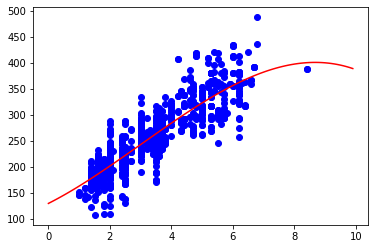

In [47]:
import matplotlib.pyplot as plt
plt.plot(XX,yy,'-r')
plt.scatter(X,y,  color='blue')
